CNN

--2020-12-13 16:28:39--  https://raw.githubusercontent.com/LakshBhambhani/InterSTEM-ML-Research/main/LungCancerDetection/data/train/image_1000078.jpg?token=AMXHCDEMC6JMOILCOR6YBU273552Y
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 796 [image/jpeg]
Saving to: ‘image_1000078.jpg?token=AMXHCDEMC6JMOILCOR6YBU273552Y’

image_1000078.jpg?t 100%[===================>]     796  --.-KB/s    in 0s      

2020-12-13 16:28:40 (43.9 MB/s) - ‘image_1000078.jpg?token=AMXHCDEMC6JMOILCOR6YBU273552Y’ saved [796/796]

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2625 - accuracy: 0.9513 - val_loss: 0.0857 - val_accuracy: 0.9732
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9800 - val_loss: 0.0725 - v

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

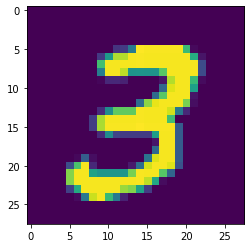

In [13]:
from keras.datasets import mnist

!wget https://raw.githubusercontent.com/LakshBhambhani/InterSTEM-ML-Research/main/LungCancerDetection/data/train/image_1000078.jpg?token=AMXHCDEMC6JMOILCOR6YBU273552Y
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt

#plot the first image in the dataset

plt.imshow(X_train[7])

#check image shape
X_train[0].shape

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

from keras.utils import to_categorical

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

#compile model using accuracy to measure model performance

model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 3 )

#predict first 4 images in the test set
model.predict(X_test[:4])
#actual results for first 4 images in test set
y_test[:4]

